In [3]:
# COMPETITION TITLE (the 'Competition'): What's Cooking?

# COMPETITION SPONSOR: Kaggle

# COMPETITION WEBSITE: https://www.kaggle.com/c/whats-cooking-kernels-only

# PRIZES: Knowledge

import pandas as pd
import os

train = pd.read_json('train.json')
test = pd.read_json('test.json')
print(train.head())

cuisines = train.cuisine.unique()
print(cuisines)

       cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...
['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


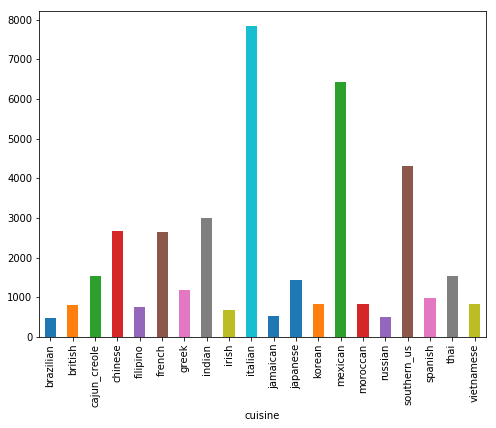

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
train.groupby('cuisine').ingredients.count().plot.bar(ylim=0)
plt.show()

In [4]:
def gen_ing_count(df):
    ing_count = {}
    for index, row in df.iterrows():
        for ing in row['ingredients']:
            if ing in ing_count:
                ing_count[ing] += 1
            else:
                ing_count[ing] = 1
    return(ing_count)

ing_count = gen_ing_count(train)

from wordcloud import WordCloud

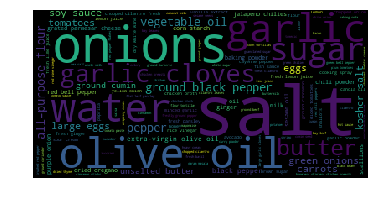

In [4]:
from wordcloud import WordCloud

def gen_wc(ing_count):
    wc = WordCloud().generate_from_frequencies(frequencies = ing_count)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    plt.rcParams['figure.figsize'] = [20, 13]
    pass

gen_wc(ing_count)

In [5]:
newdf_list = []
COLS = ['cuisine', 'ingredient']

for index, row in train.iterrows():
    for ing in row['ingredients']:
        newdf_list.append([row['cuisine'], ing])
        
newdf = pd.DataFrame(newdf_list, columns=COLS)
ct = pd.crosstab(newdf.ingredient, newdf.cuisine)
#frequencies

In [6]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

top_corr = get_top_abs_correlations(ct, n = 10)

In [7]:
newdf_list = []
COLS = ['cuisine', 'ingredient', 'recipe']

recipe_num = 0
for index, row in train.iterrows():
    recipe_num += 1
    for ing in row['ingredients']:
        newdf_list.append([row['cuisine'], ing, recipe_num])
        
newdf = pd.DataFrame(newdf_list, columns=COLS)
print(newdf.head())

  cuisine       ingredient  recipe
0   greek  romaine lettuce       1
1   greek     black olives       1
2   greek   grape tomatoes       1
3   greek           garlic       1
4   greek           pepper       1


In [8]:
#how many recipes in each cuisine use each ingredient
g = newdf.groupby(['cuisine', 'ingredient']).count()
g = g['recipe'].groupby(level=0, group_keys=False)
f = g.nlargest(10)

unique_ing = []

for cuis, ing in f.index:
    if ing not in unique_ing:
        unique_ing.append(ing)
print(unique_ing)


['salt', 'onions', 'olive oil', 'lime', 'water', 'garlic cloves', 'garlic', 'cachaca', 'sugar', 'tomatoes', 'all-purpose flour', 'butter', 'milk', 'eggs', 'unsalted butter', 'baking powder', 'large eggs', 'green bell pepper', 'cayenne pepper', 'cajun seasoning', 'soy sauce', 'sesame oil', 'corn starch', 'green onions', 'vegetable oil', 'scallions', 'pepper', 'oil', 'carrots', 'ground black pepper', 'dried oregano', 'feta cheese crumbles', 'extra-virgin olive oil', 'fresh lemon juice', 'garam masala', 'ground turmeric', 'cumin seed', 'ground cumin', 'potatoes', 'baking soda', 'grated parmesan cheese', 'ground allspice', 'dried thyme', 'black pepper', 'mirin', 'sake', 'rice vinegar', 'ginger', 'sesame seeds', 'chili powder', 'jalapeno chilies', 'sour cream', 'avocado', 'corn tortillas', 'ground cinnamon', 'ground ginger', 'paprika', 'buttermilk', 'red bell pepper', 'fish sauce', 'coconut milk', 'fresh lime juice', 'shallots']
